<a href="https://colab.research.google.com/github/gajapathyvenkatesh/TamilTeacher/blob/main/PYF_Project_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 78.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
orders_df = pd.read_csv("/content/drive/MyDrive/PyProgDir/foodhub_order.csv")

In [ ]:
# Write your code here to view the first 5 rows
orders_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
orders_df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns of data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Rating is represented as String instead of integer. All columns are non-null with 1898 data.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
No missing values found in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
orders_df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
orders_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

1.   Average cost of the order is $16.50. 50% of the food cost are below average.
2.   Average food preparation time is 27 minutes and average delivery time is 24 minutes. Together, preparation and delivery takes 27+24=51 minutes average.
3.   Minimum food preparation time is 20 minutes and minimum delivery time is 15 minutes. Together, preparation and delivery takes 20+15=35 minutes minimum.
4.   Maximum food preparation time is 35 minutes and maximum delivery time is 33 minutes. Together, preparation and delivery takes 35+33=68 minutes maximum.



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
orders_df[orders_df["rating"].isna()].shape


(0, 9)

In [ ]:
orders_df["rating"].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
(orders_df['rating'] != 'Not given').sum()

np.int64(1162)

In [ ]:
(orders_df['rating'] == 'Not given').sum()

np.int64(736)

#### Observations:
In total 1898 records 1162 records are rated and 736 are not rated.

1898 - 1162 = 736.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
orders_df[orders_df["rating"].isna()].shape

(0, 9)

In [ ]:
orders_df['rating'] = orders_df['rating'].replace('Not given', np.nan).astype(float)

In [ ]:
orders_df[orders_df["rating"].isna()].shape

(736, 9)

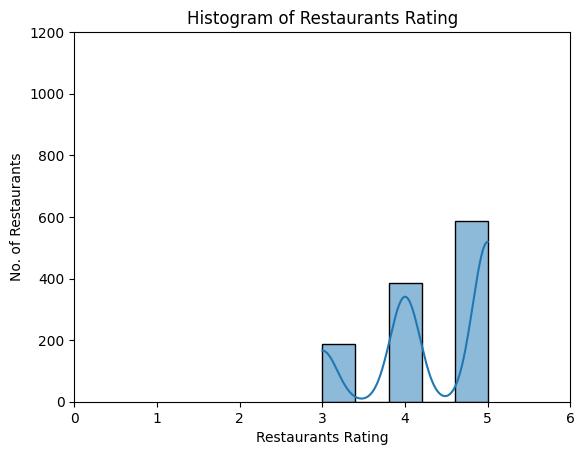

In [ ]:
# Write the code here
plt.title('Histogram of Restaurants Rating')
plt.xlim(0,6)
plt.ylim(0,1200)
plt.xlabel('Restaurants Rating')
plt.ylabel('No. of Restaurants')
sns.histplot(data=orders_df, x='rating', kde=True, bins=5);

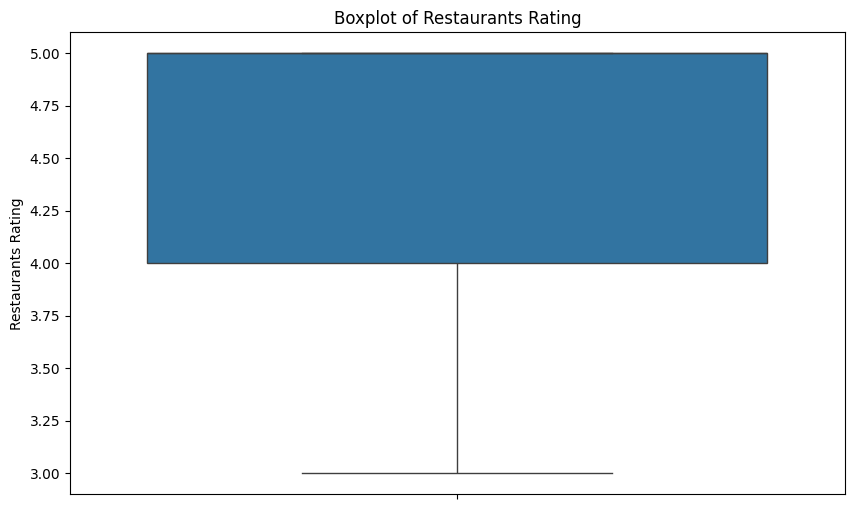

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders_df, y='rating')
plt.ylabel('Restaurants Rating')
# plt.xlabel('No. of Restaurants')
plt.title('Boxplot of Restaurants Rating')
plt.show()

## Observations:
Among those available ratings, between 4 and 5 are the most.

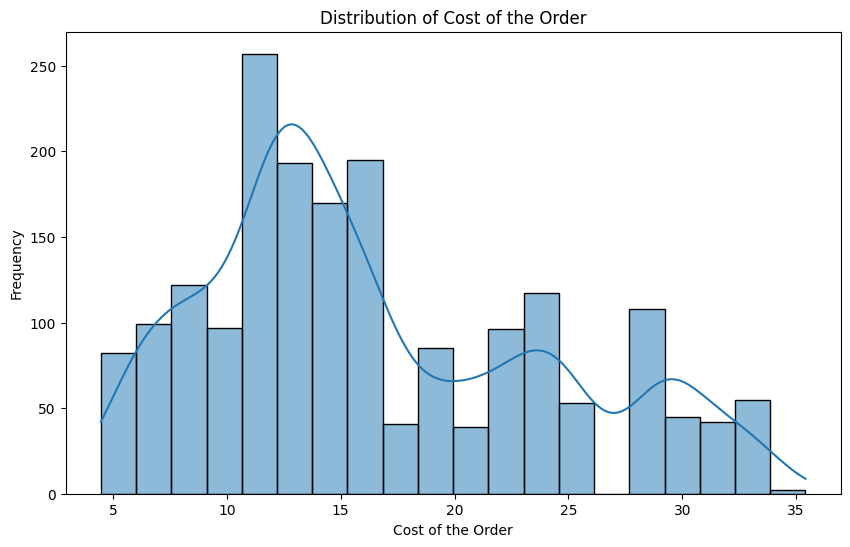

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=orders_df, x='cost_of_the_order', kde=True, bins=20)
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.title('Distribution of Cost of the Order')
plt.show()

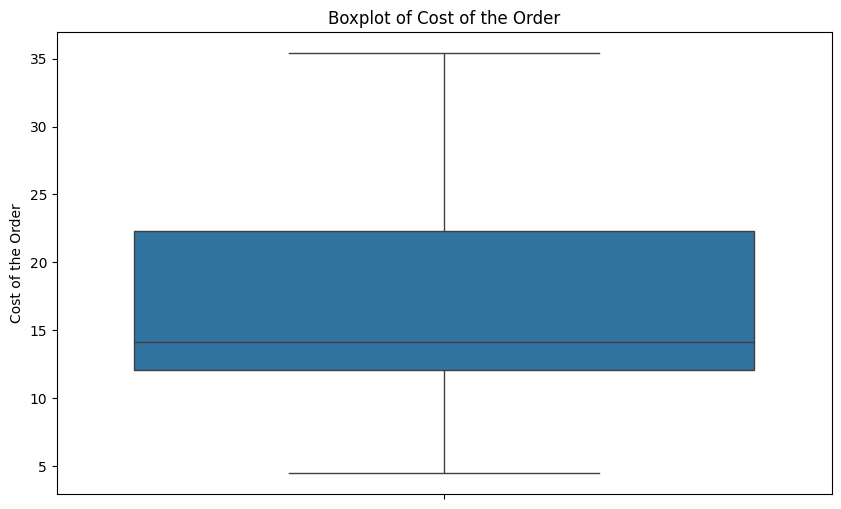

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders_df, y='cost_of_the_order')
plt.ylabel('Cost of the Order')
plt.title('Boxplot of Cost of the Order')
plt.show()

## Observations:
Between 10 and 15 dollars are the most frequent ordering costs.

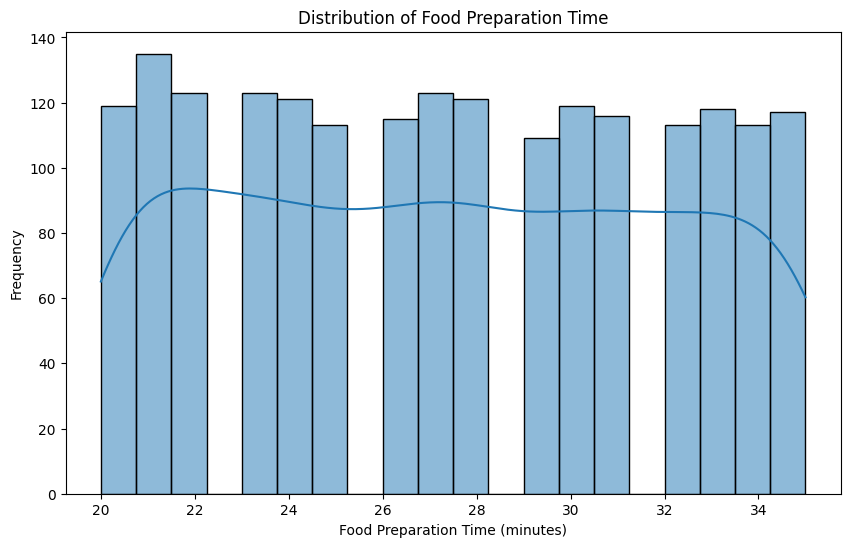

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=orders_df, x='food_preparation_time', kde=True, bins=20)
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Food Preparation Time')
plt.show()

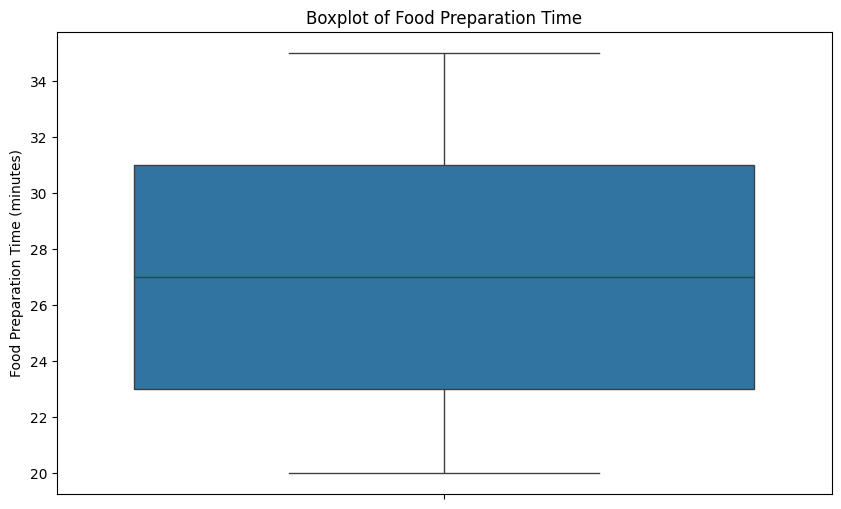

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders_df, y='food_preparation_time')
plt.ylabel('Food Preparation Time (minutes)')
plt.title('Boxplot of Food Preparation Time')
plt.show()

## Observations:
Based on the graph, Food prepation time doesn't affect the frequency of buying.

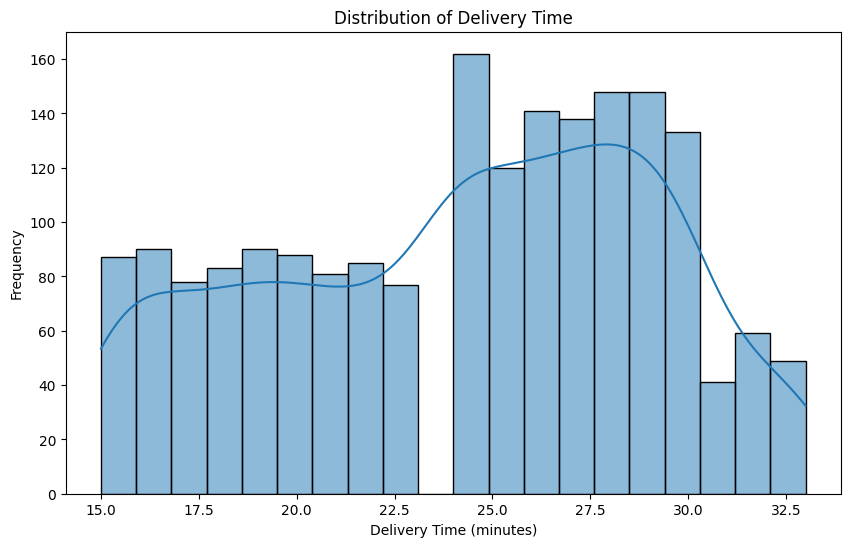

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=orders_df, x='delivery_time', kde=True, bins=20)
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Time')
plt.show()

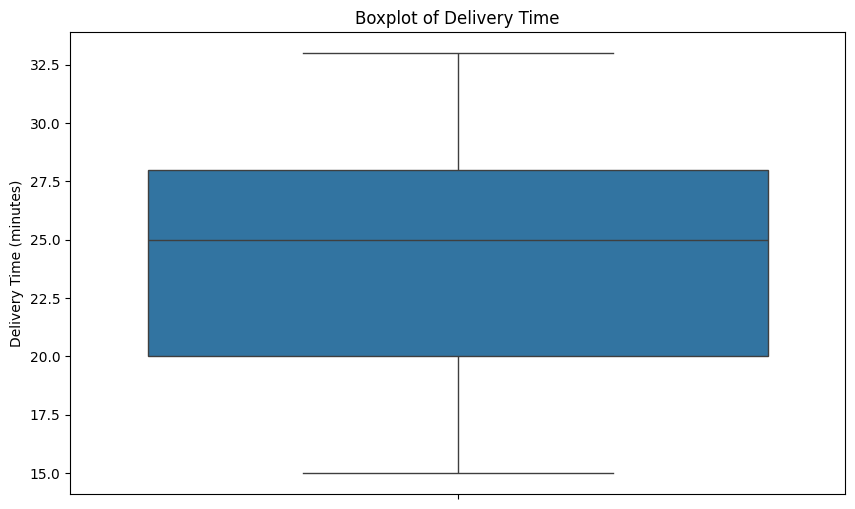

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders_df, y='delivery_time')
plt.ylabel('Delivery Time (minutes)')
plt.title('Boxplot of Delivery Time')
plt.show()

## Observations:
Based on the graph, increase in delivery time between 25 and 30 has increased the buying frequency.

### Catagorical Variable

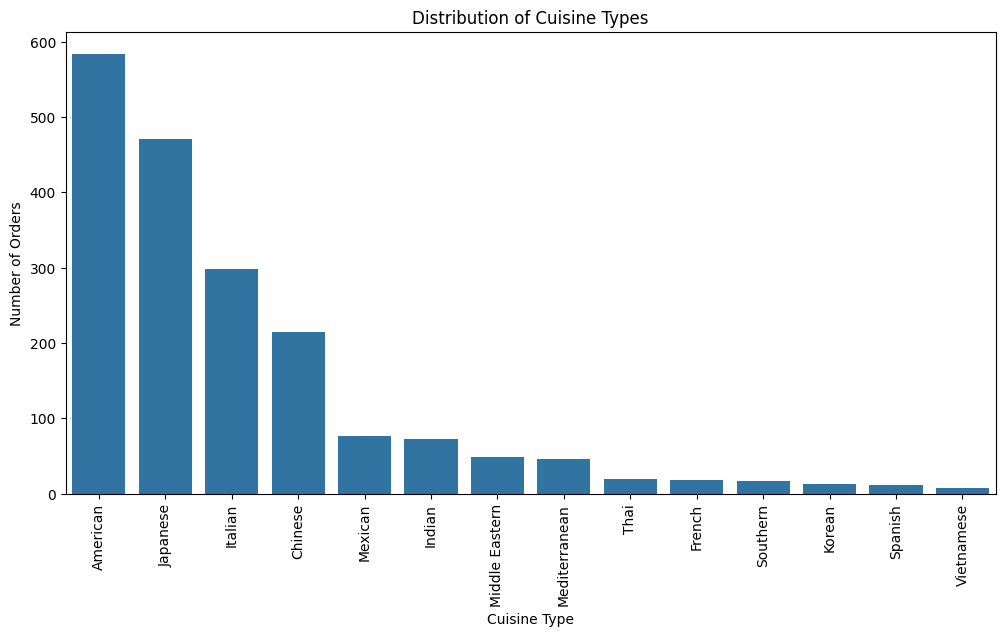

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=orders_df, x='cuisine_type', order=orders_df['cuisine_type'].value_counts().index)
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.title('Distribution of Cuisine Types')
plt.xticks(rotation=90)
plt.show()

## Observations:
Number of Orders are more for American cuisine. Japanese and Italian follows the next highest.

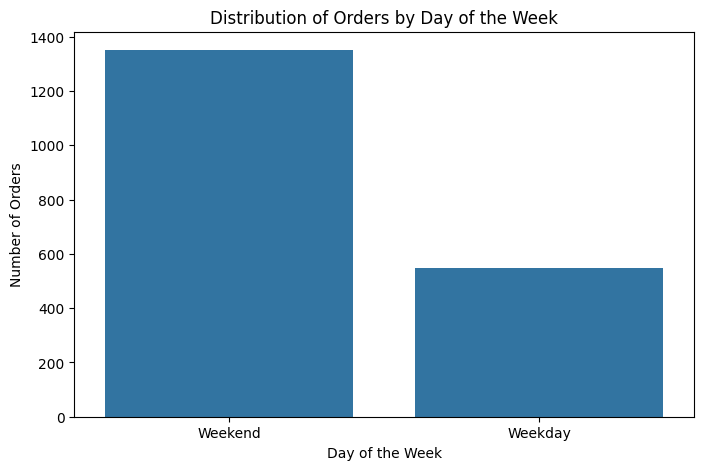

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=orders_df, x='day_of_the_week', order=orders_df['day_of_the_week'].value_counts().index)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Day of the Week')
plt.show()

## Observations:
Weekend orders are more than 200% higher than Weekday orders.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


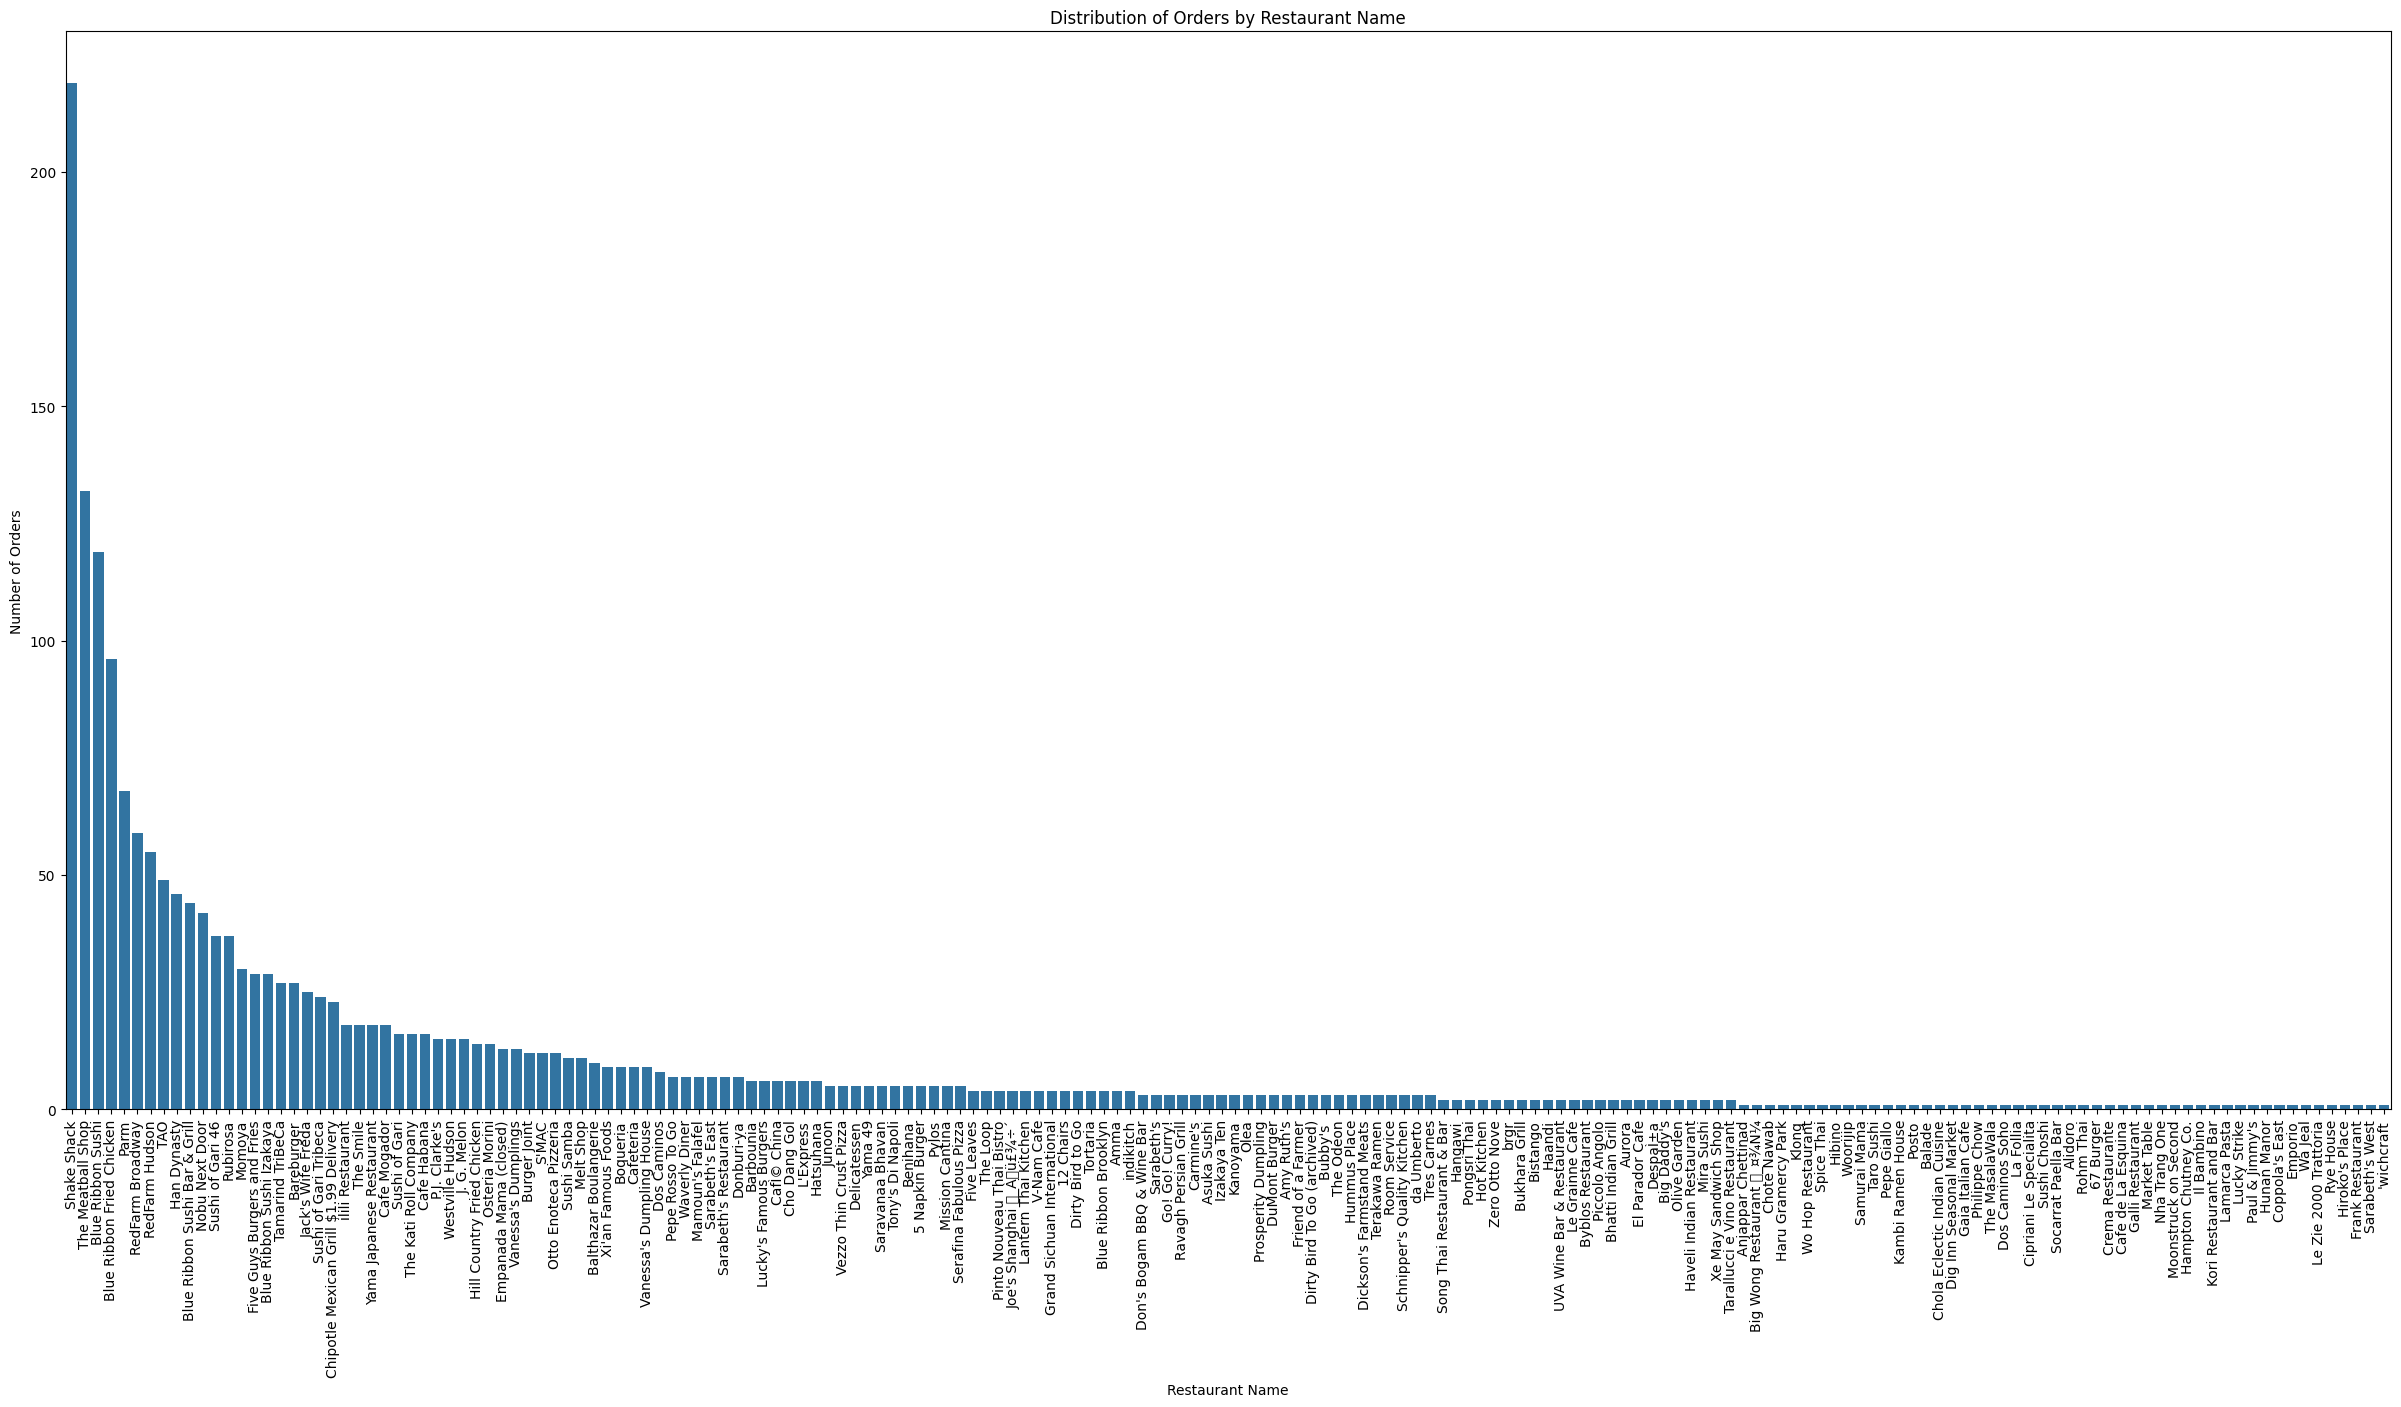

In [ ]:
plt.figure(figsize=(30, 14))
sns.countplot(data=orders_df, x='restaurant_name', order=orders_df['restaurant_name'].value_counts().index)
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Restaurant Name')
plt.xticks(rotation=90)
plt.show()

## Observations:
Top 5 restaurants receives more order than any other restaurants. Graph is right skewed.

In [ ]:
orders_df["customer_id"].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


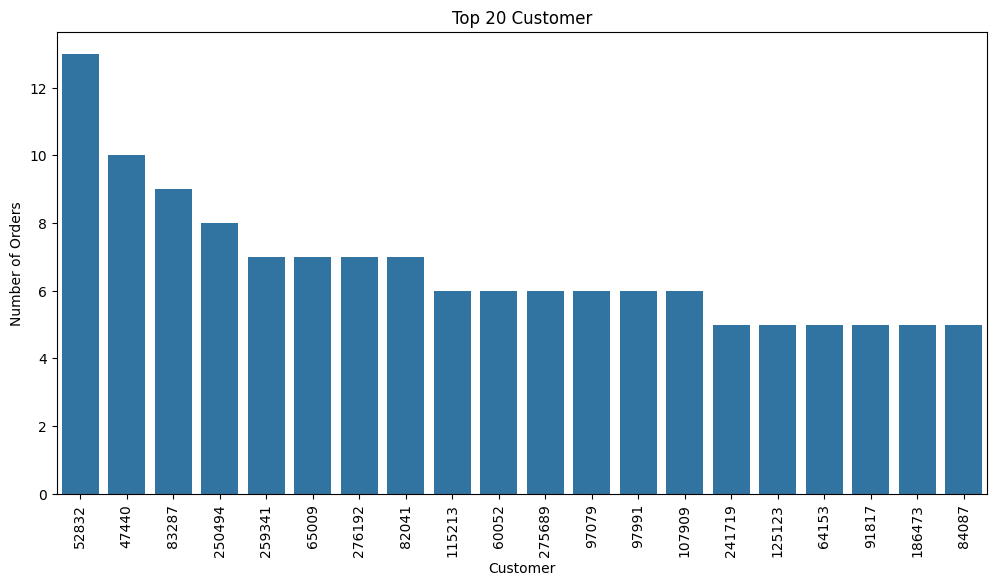

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=orders_df, x='customer_id', order=orders_df['customer_id'].value_counts().head(20).index)
plt.xlabel('Customer')
plt.ylabel('Number of Orders')
plt.title('Top 20 Customer')
plt.xticks(rotation=90)
plt.show()

## Observations:
Top 20 customers and their number of orders are greater than 4 orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
orders_df["restaurant_name"].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
Based on the top five restaurants:
1. One restaurant received orders more than two hundred.
2. Two restaurants received orders more than one hundred.
3. Two restaurants received orders between fifty and hundred.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
orders_df[orders_df["day_of_the_week"] == "Weekend"]["cuisine_type"].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


#### Observations:
Based on the data, American cuisine is the most popular cuisine on the weekends. Next three popular are Japanese, Italian and Chinese cuisines.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
orders_df[orders_df["cost_of_the_order"] > 20].shape[0]

555

In [ ]:
orders_df.shape[0]

1898

In [ ]:
orders_df[orders_df["cost_of_the_order"] > 20].shape[0] / orders_df.shape[0] * 100

29.24130663856691

#### Observations:
29.24% of the orders cost more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
orders_df["delivery_time"].mean()

np.float64(24.161749209694417)

#### Observations:
Average order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
orders_df["customer_id"].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Among the top most three frequent customers, 52832 is in the first place, 47440 is in second place and 83287 is in third place.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


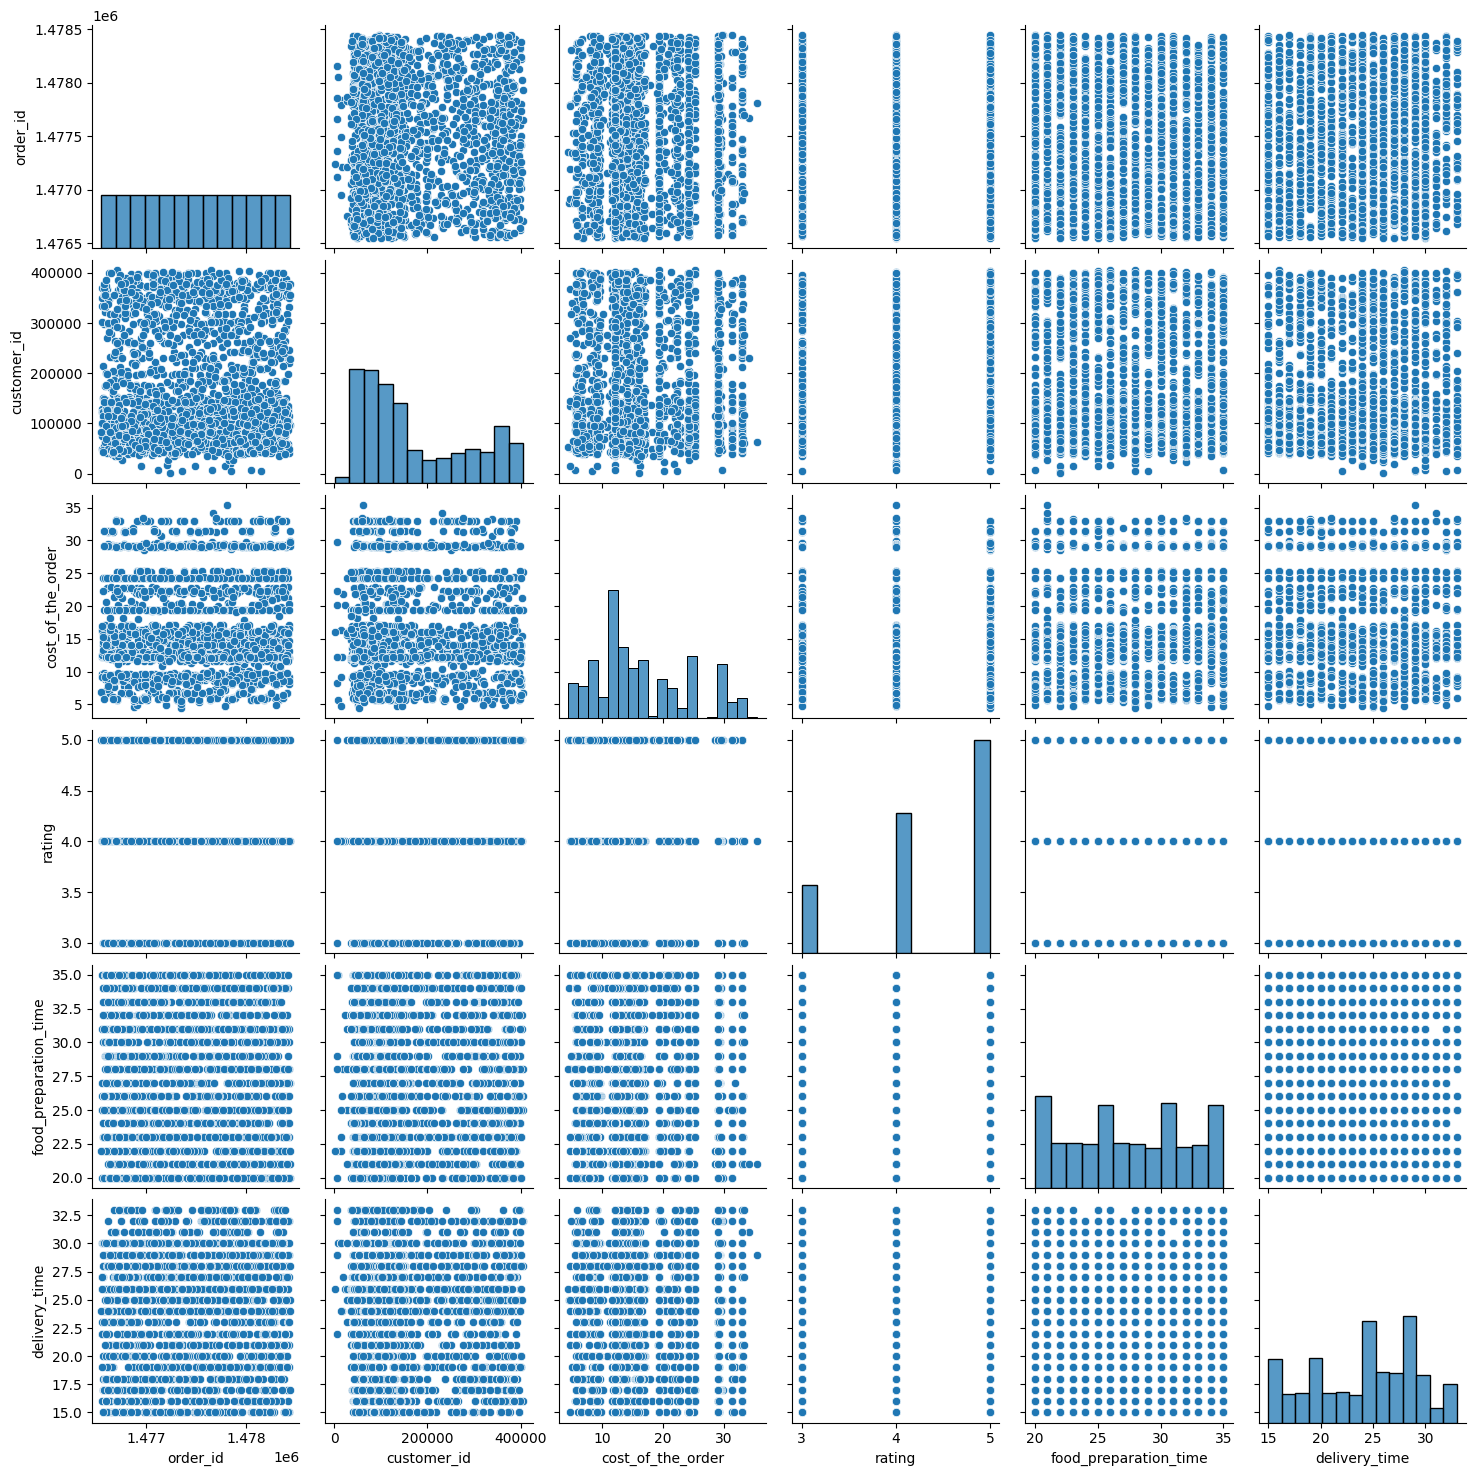

In [ ]:
# Write the code here
sns.pairplot(orders_df);

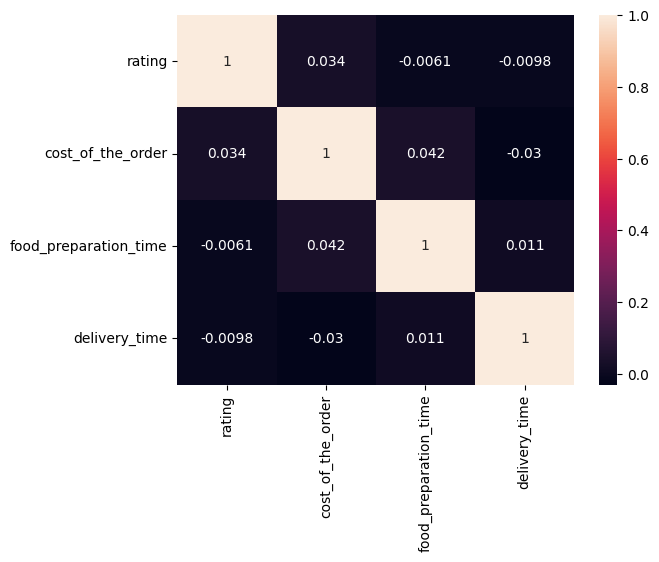

In [ ]:
sns.heatmap(data=orders_df[['rating','cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True);

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
orders_df["rating"].count()

np.int64(1162)

In [ ]:
restaurant_ratings = orders_df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

promotional_offer_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

print(promotional_offer_restaurants.sort_values(by='count', ascending=False))

                           count      mean
restaurant_name                           
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905
Blue Ribbon Sushi             73  4.219178
Blue Ribbon Fried Chicken     64  4.328125


#### Observations:
Among the rated 1162 Restaurants, above are the Restaurants having rating more than 50 and average rating more than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
orders_df['revenue'] = 0.0
orders_df.loc[orders_df['cost_of_the_order'] > 20, 'revenue'] = orders_df['cost_of_the_order'] * 0.25
orders_df.loc[(orders_df['cost_of_the_order'] > 5) & (orders_df['cost_of_the_order'] <= 20), 'revenue'] = orders_df['cost_of_the_order'] * 0.15

net_revenue = orders_df['revenue'].sum()
print(net_revenue)

6166.303


#### Observations:
The net revenue generated by the company is: $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Calculate total time by adding food preparation time and delivery time and save into a new column.
orders_df["total_time"] = orders_df["food_preparation_time"] + orders_df["delivery_time"]

# Calculate the number of orders where total_time is greater than 60 minutes
orders_over_60_min = orders_df[orders_df['total_time'] > 60]
num_orders_over_60_min = orders_over_60_min.shape[0]

# Calculate the total number of orders
total_orders = orders_df.shape[0]

# Calculate the percentage
percentage_over_60_min = (num_orders_over_60_min / total_orders) * 100

print(percentage_over_60_min)

10.537407797681771


#### Observations:
10.54% of orders take more than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
orders_df.groupby("day_of_the_week")["delivery_time"].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


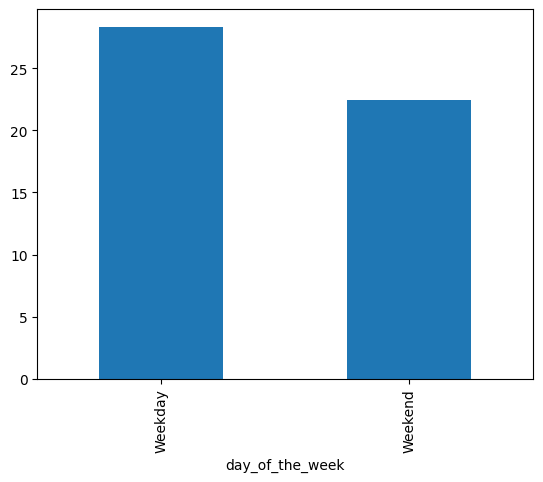

In [ ]:
orders_df.groupby("day_of_the_week")["delivery_time"].mean().plot(kind="bar");

#### Observations:
The mean delivery time vary during weekdays and weekends by approx 6 minutes. Weekend deliveries are faster than weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American, Japanese, Italian and Chinese cusine are the most popular cusines.
*  The weekend orders are more than 200% than regular weekdays.
*  The delivery time between 25 to 30 minutes in range increases the number of orders by an additional 50%.

The key takeaways are that businesses reach their peak on weekends when the order's delivery time are at an average of 27 minutes, especially bringing upon the most pofit to American cuisines.

### Recommendations:

To develop a solid business, a business should:
* concentrate more so on orders coming in from within the top 4 most popular cuisines over others.
*  employ more resources during the weekend over weekdays.
*  concentrate on customers whose orders call for 25 to 30 minutes of delivery time.



---